# my toolkit 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
%matplotlib inline 
sns.set(rc={"figure.figsize":(12.,6.)})
sns.set_style("whitegrid")

# my data 

In [2]:
df=pd.read_csv('winequality-red.csv', sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

# visualise the data 

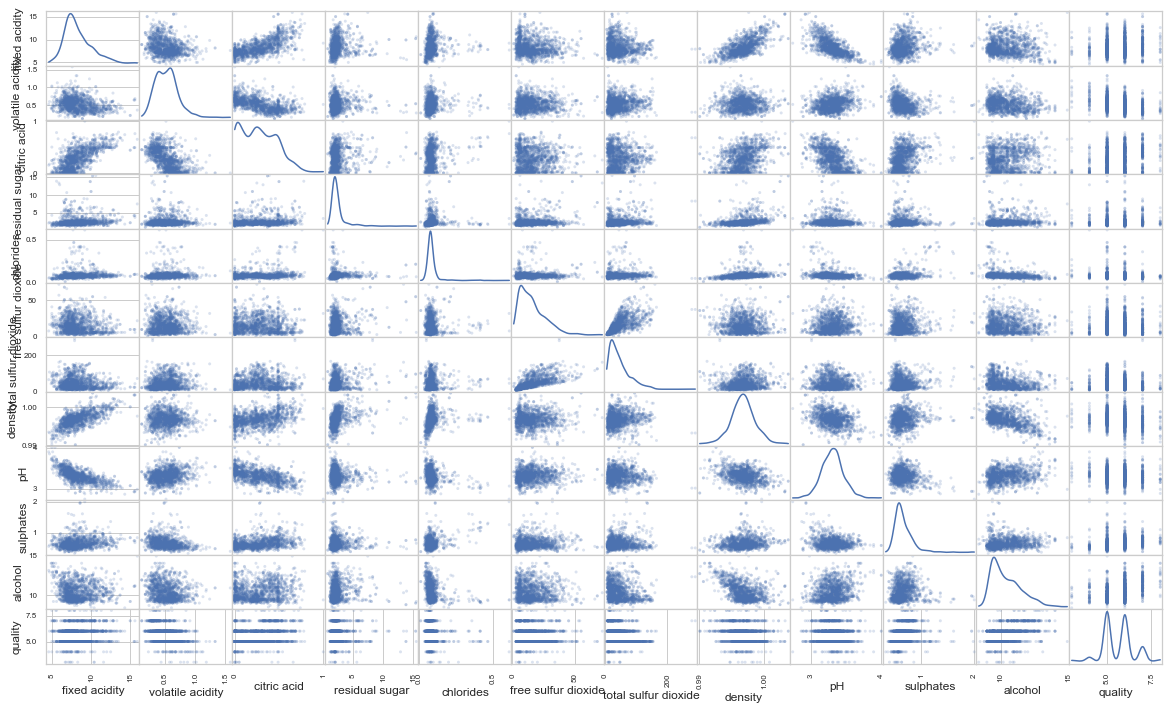

In [7]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df,alpha=0.2, figsize=(20,12),diagonal='kde');

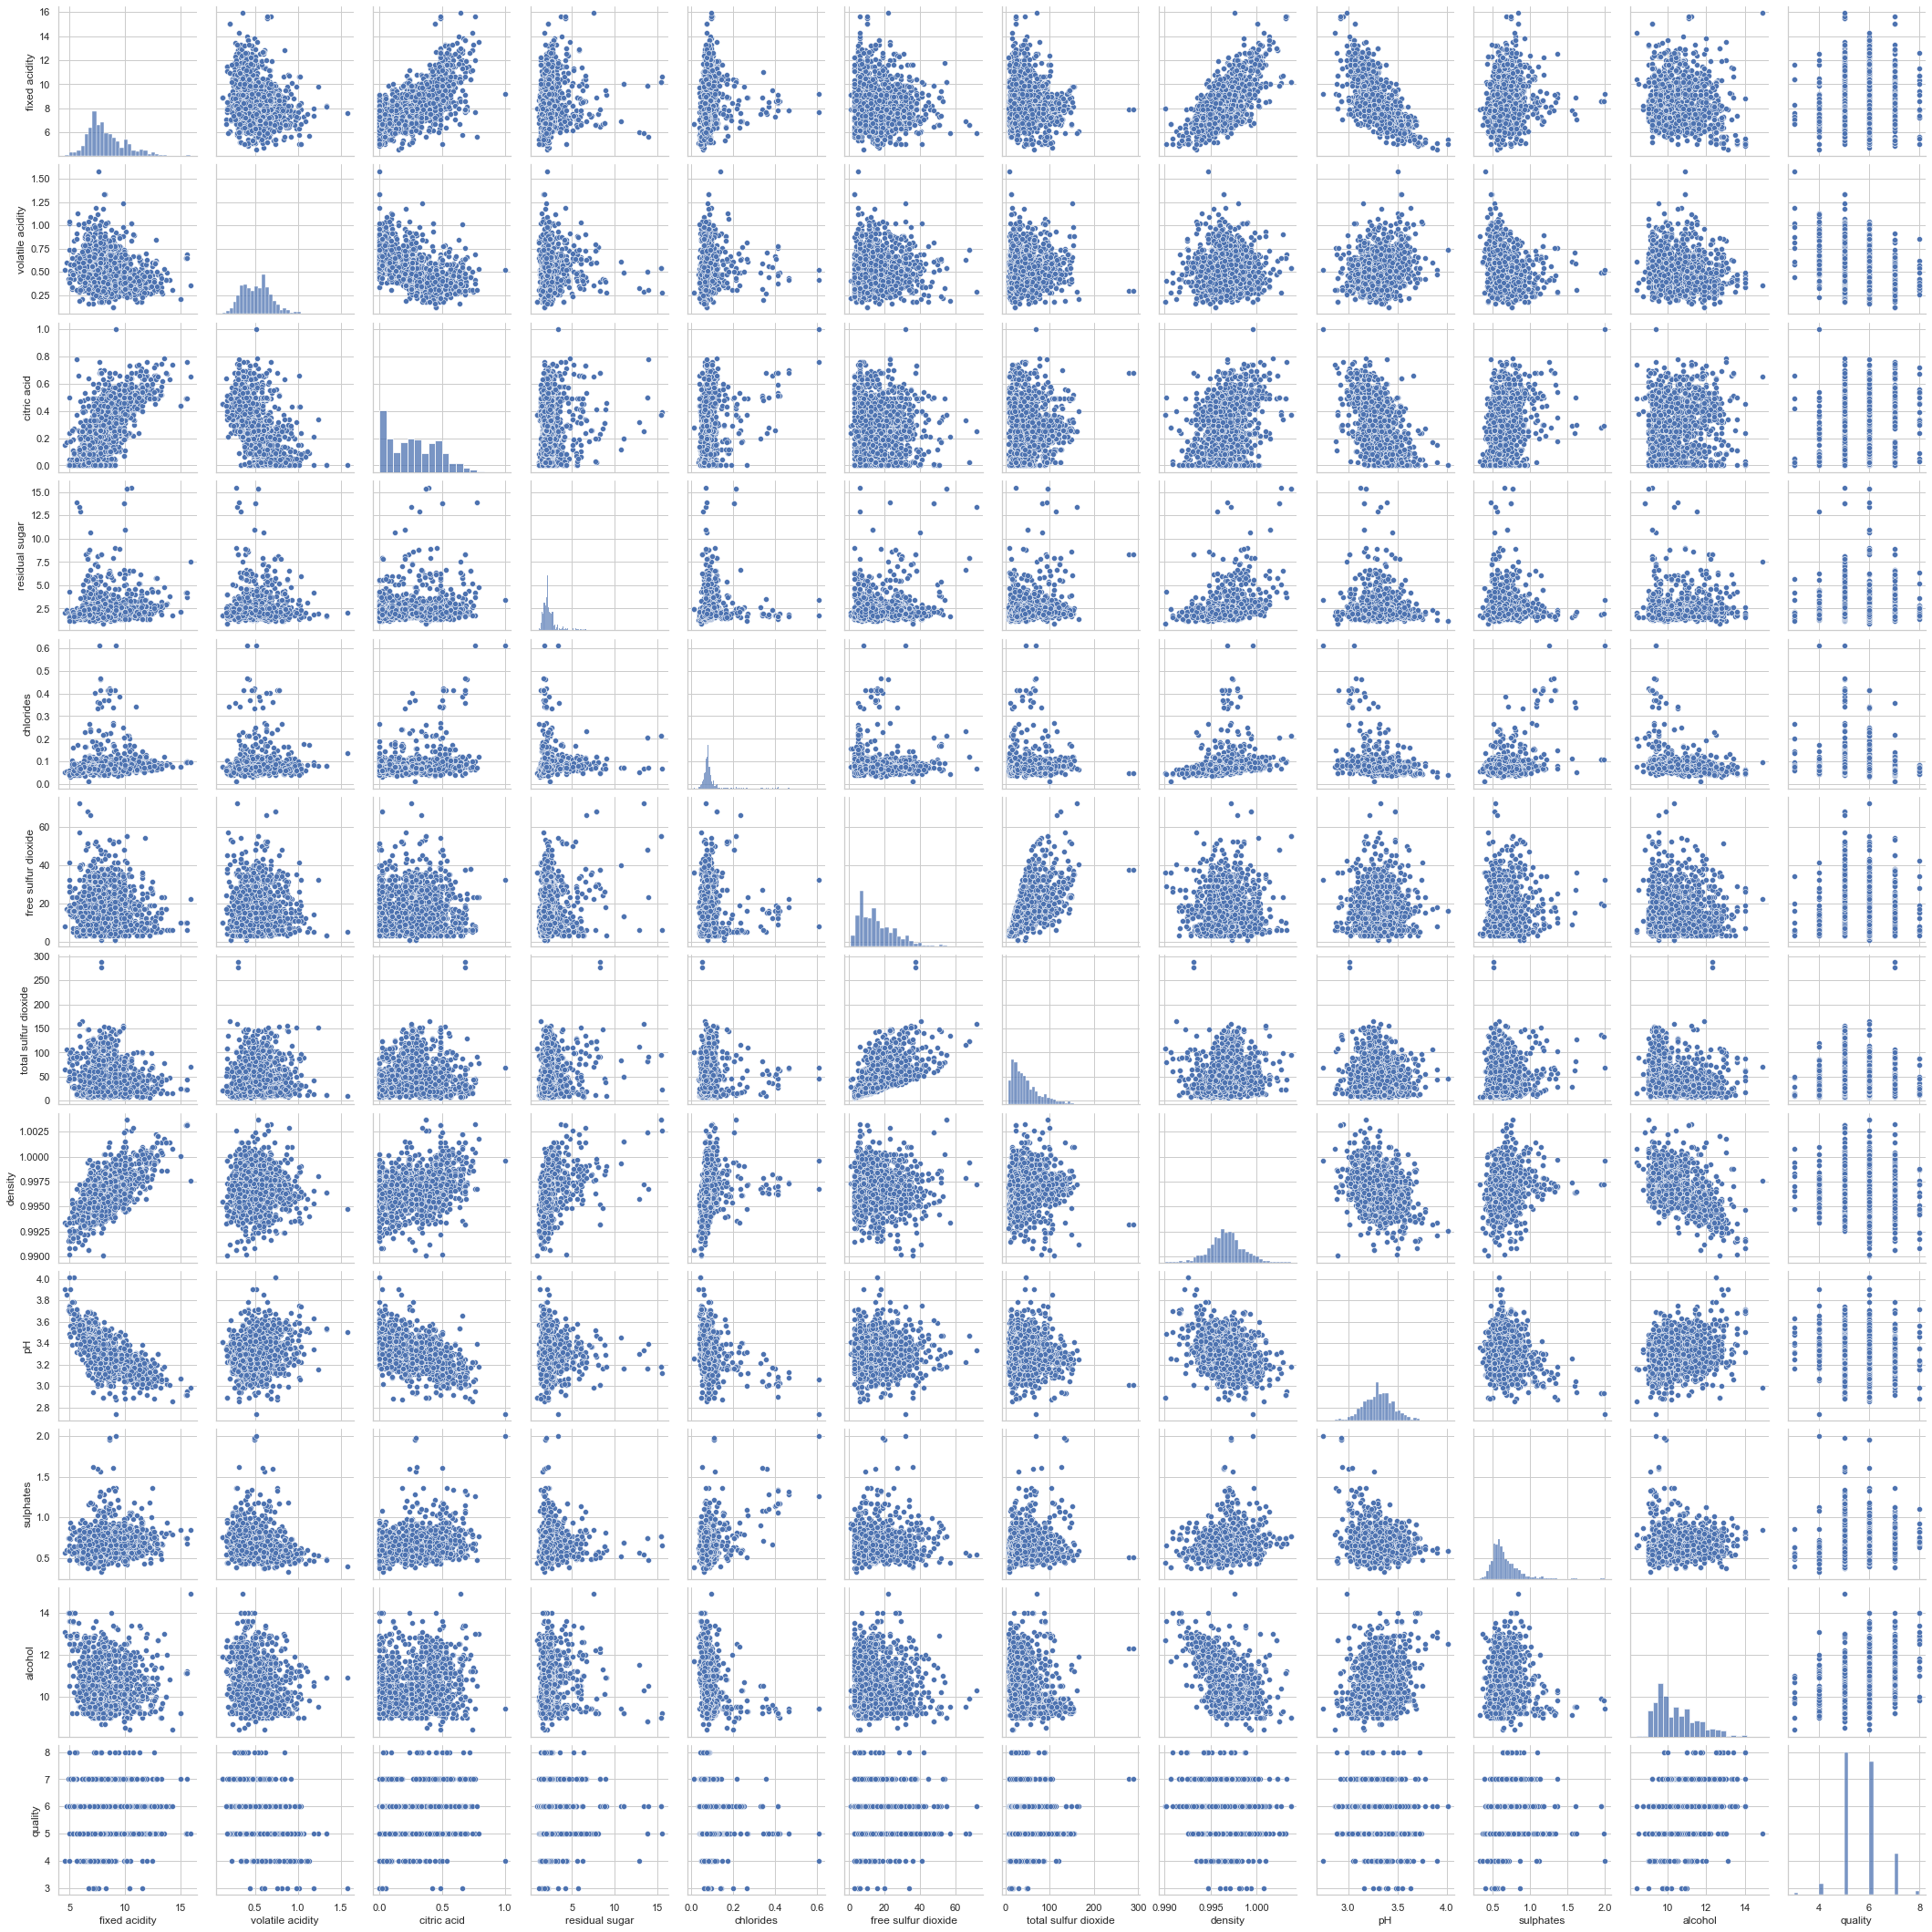

In [8]:
sns.pairplot(df);

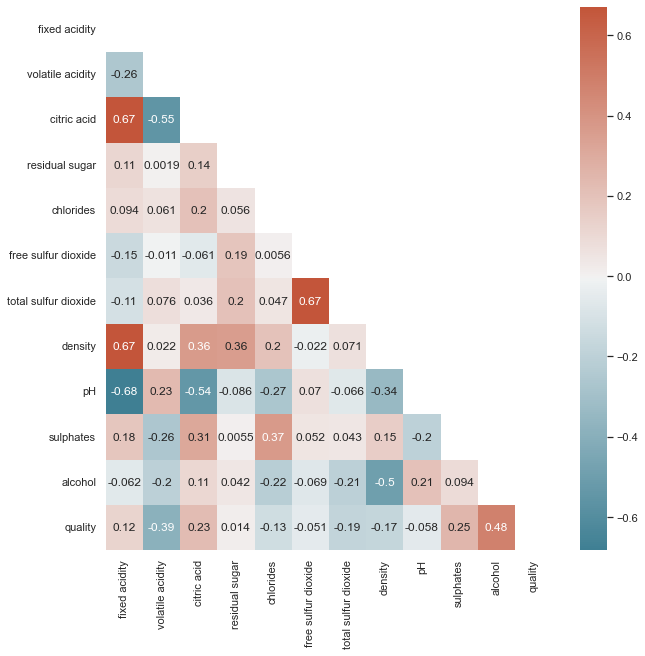

In [9]:
cm=df.corr()
mask=np.zeros_like(cm)
mask[np.triu_indices_from(mask)]=True
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(cm, mask=mask, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap = True));

In [10]:
# dropping one of highly fields - total sulfur diox and density
# also dropping anything less than -0.1 corr()
df_reduced=df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'],axis=1)

In [11]:
df_reduced.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

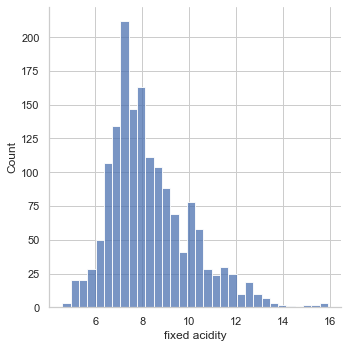

In [12]:
sns.displot(df['fixed acidity']);

In [13]:
df['fixed_acidity']=np.log(df['fixed acidity'])

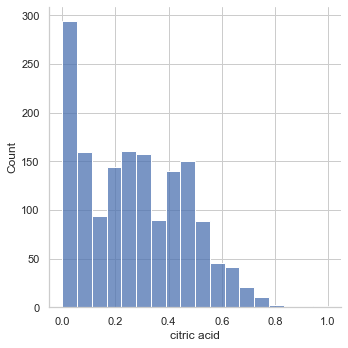

In [14]:
sns.displot(df['citric acid']);

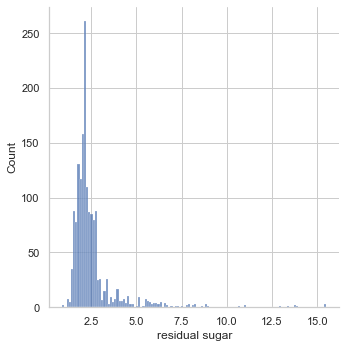

In [15]:
sns.displot(df['residual sugar']);

In [16]:
# try rescaling this column using power transformations 
from scipy import stats 
residual_sugar_new, sugar_lambda = stats.boxcox(df['residual sugar'])

In [17]:
residual_sugar_new

array([0.45004949, 0.5729387 , 0.5302327 , ..., 0.5302327 , 0.47338159,
       0.66041541])

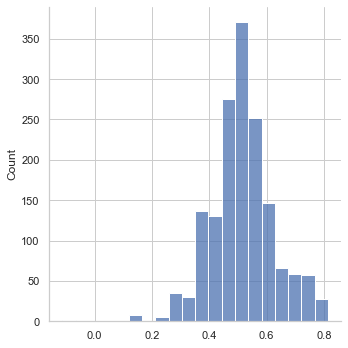

In [18]:
sns.displot(residual_sugar_new,bins=20);

In [19]:
residual_sugar_new_2= np.log(df['residual sugar']) 

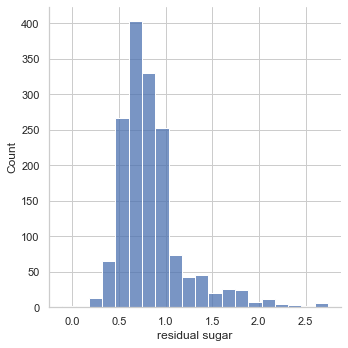

In [20]:
sns.displot(residual_sugar_new_2,bins=20);

In [21]:
df['residual sugar']= np.log(df['residual sugar'])

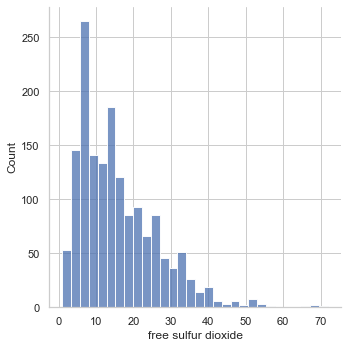

In [22]:
sns.displot(df['free sulfur dioxide']);

In [23]:
df['free sulfur dioxide']=np.log(df['free sulfur dioxide'])

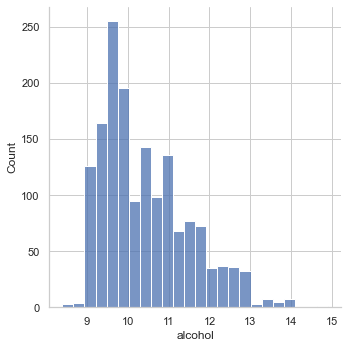

In [24]:
sns.displot(df['alcohol']);

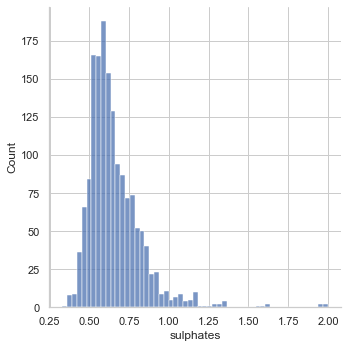

In [25]:
sns.displot(df['sulphates']);

In [26]:
df['sulphates']=np.log(df['sulphates'])

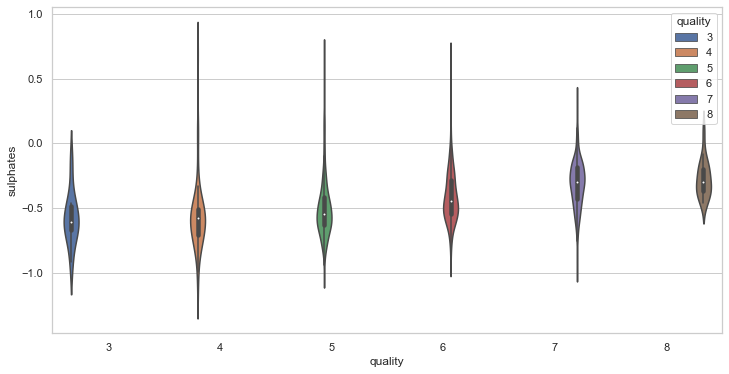

In [27]:
ax = sns.violinplot(x="quality", y="sulphates", hue="quality",
                    data=df, palette='deep');

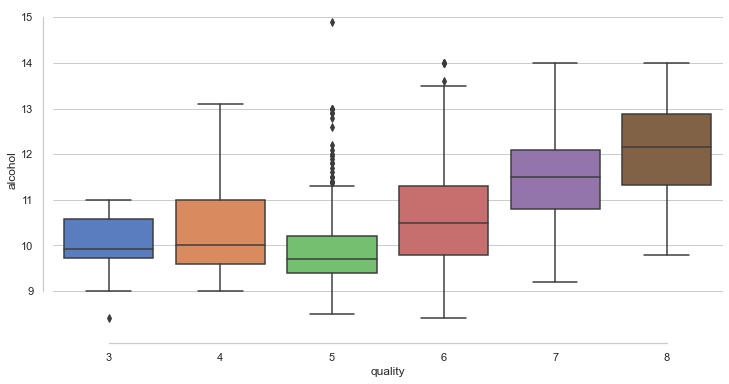

In [28]:
sns.boxplot(x="quality", y="alcohol",palette='muted',
            data=df)
sns.despine(offset=10, trim=True);

# replace columns with transformations as needed 

In [29]:
df_reduced=df.drop(['volatile acidity','chlorides','total sulfur dioxide','density','pH'],axis=1)

In [30]:
df_reduced.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,quality,fixed_acidity
0,7.4,0.00,0.641854,2.397895,-0.579818,9.4,5,2.001480
1,7.8,0.00,0.955511,3.218876,-0.385662,9.8,5,2.054124
2,7.8,0.04,0.832909,2.708050,-0.430783,9.8,5,2.054124
3,11.2,0.56,0.641854,2.833213,-0.544727,9.8,6,2.415914
4,7.4,0.00,0.641854,2.397895,-0.579818,9.4,5,2.001480


# Change quality label to object, check it and set as y 

In [31]:
#df_reduced['quality']=df_reduced['quality'].astype(object) # this is not necessary and causes and error with sklearn

In [32]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fixed acidity        1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   residual sugar       1599 non-null   float64
 3   free sulfur dioxide  1599 non-null   float64
 4   sulphates            1599 non-null   float64
 5   alcohol              1599 non-null   float64
 6   quality              1599 non-null   int64  
 7   fixed_acidity        1599 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


In [33]:
y=df_reduced['quality']
X=df_reduced.drop(['quality'],axis=1)

In [34]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Scale all of X 

In [35]:
# set scaler 
scaler=MinMaxScaler()

In [36]:
X_scaled=scaler.fit_transform(X)

In [37]:
X_scaled

array([[0.24778761, 0.        , 0.26253048, ..., 0.29350719, 0.15384615,
        0.38332497],
       [0.28318584, 0.        , 0.37273268, ..., 0.4012633 , 0.21538462,
        0.42577059],
       [0.28318584, 0.04      , 0.3296569 , ..., 0.37622157, 0.21538462,
        0.42577059],
       ...,
       [0.15044248, 0.13      , 0.3296569 , ..., 0.45564218, 0.4       ,
        0.25356991],
       [0.11504425, 0.12      , 0.28055216, ..., 0.42522375, 0.27692308,
        0.20068009],
       [0.12389381, 0.47      , 0.48706841, ..., 0.38469498, 0.4       ,
        0.21423134]])

In [38]:
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

In [39]:
X_scaled_df.head()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,fixed_acidity
0,0.247788,0.00,0.262530,0.560693,0.293507,0.153846,0.383325
1,0.283186,0.00,0.372733,0.752660,0.401263,0.215385,0.425771
2,0.283186,0.04,0.329657,0.633215,0.376222,0.215385,0.425771
3,0.584071,0.56,0.262530,0.662482,0.312983,0.215385,0.717475
4,0.247788,0.00,0.262530,0.560693,0.293507,0.153846,0.383325


In [40]:
X_scaled_df.describe()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,sulphates,alcohol,fixed_acidity
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.270976,0.335743,0.595354,0.368187,0.311228,0.461329
std,0.154079,0.194801,0.125586,0.160240,0.124079,0.163949,0.160782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.090000,0.262530,0.455006,0.283507,0.169231,0.349957
50%,0.292035,0.260000,0.314039,0.617083,0.349996,0.276923,0.436042
75%,0.407080,0.420000,0.372733,0.711892,0.440641,0.415385,0.558871
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train Test split 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.30,random_state=40)

# set up and apply the model 

In [61]:
Knn=KNeighborsClassifier(n_neighbors=5)

In [62]:
y_train.value_counts()

5    482
6    445
7    138
4     39
8     10
3      5
Name: quality, dtype: int64

In [63]:
Knn.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
y_pred=Knn.predict(X_test)

In [65]:
y_pred

array([5, 5, 5, 5, 5, 5, 6, 7, 4, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 6, 4, 5, 6, 6, 6, 5,
       5, 6, 6, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 4,
       6, 5, 5, 7, 6, 6, 6, 5, 5, 7, 6, 6, 5, 6, 5, 6, 7, 6, 6, 6, 4, 6,
       7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 5, 8, 6, 5, 7, 5, 7, 6, 6, 5, 5, 6, 6, 6, 5, 7, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5,
       6, 7, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 6, 6, 6, 6, 5, 7, 7,
       7, 6, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 4, 5, 6, 5, 6, 6,

In [66]:
c_m=confusion_matrix(y_test,y_pred)
c_m

array([[  0,   2,   2,   1,   0,   0],
       [  0,   0,   8,   6,   0,   0],
       [  0,   6, 145,  46,   2,   0],
       [  0,   2,  53, 120,  18,   0],
       [  0,   0,   8,  30,  22,   1],
       [  0,   0,   1,   4,   3,   0]])

In [67]:
y_test.value_counts()

5    199
6    193
7     61
4     14
8      8
3      5
Name: quality, dtype: int64

In [68]:
y_train.value_counts()

5    482
6    445
7    138
4     39
8     10
3      5
Name: quality, dtype: int64

In [69]:
accuracy_score(y_test,y_pred)

0.5979166666666667

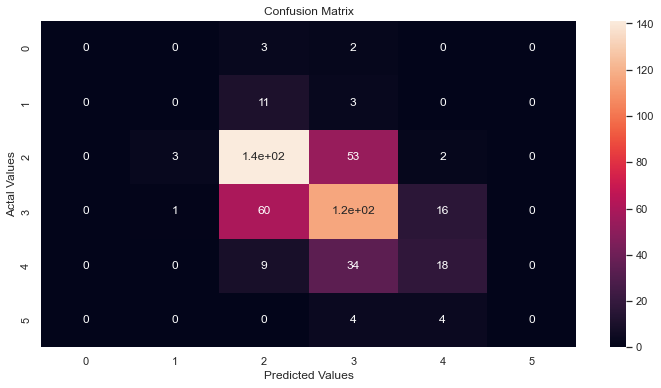

In [54]:
sns.heatmap(c_m, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show();

# Find correct k 

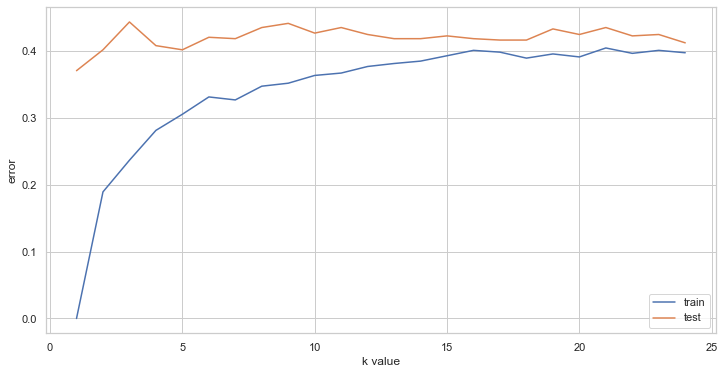

In [59]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(np.mean(y_train!=y_pred1)) # or append accuracy_score(y_test,y_pred)
    y_pred2=knn.predict(X_test)
    error_test.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,25),error_train,label='train')
plt.plot(range(1,25),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

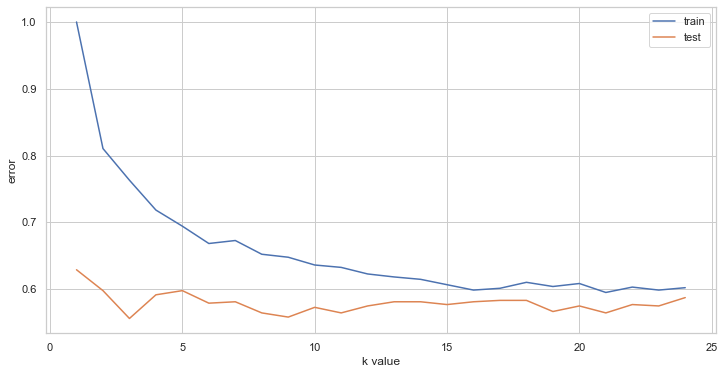

In [60]:
error_train=[]
error_test=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1=knn.predict(X_train)
    error_train.append(accuracy_score(y_train,y_pred1))
    y_pred2=knn.predict(X_test)
    error_test.append(accuracy_score(y_test,y_pred2))
plt.plot(range(1,25),error_train,label='train')
plt.plot(range(1,25),error_test,label='test')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend();

# Activity

In [70]:
data = df[['alcohol','sulphates','quality']]

In [73]:
data_sample=data.sample(n=100, random_state=40, replace=False)

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.plotting import plot_decision_regions

In [82]:
def knn_comparison(data, k):
    x = data.iloc[:, 0:2].values
    y = data.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(x, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show();

/usr/local/Caskroom/miniconda/base/envs/class/lib/python3.9/site-packages/mlxtend/plotting/decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


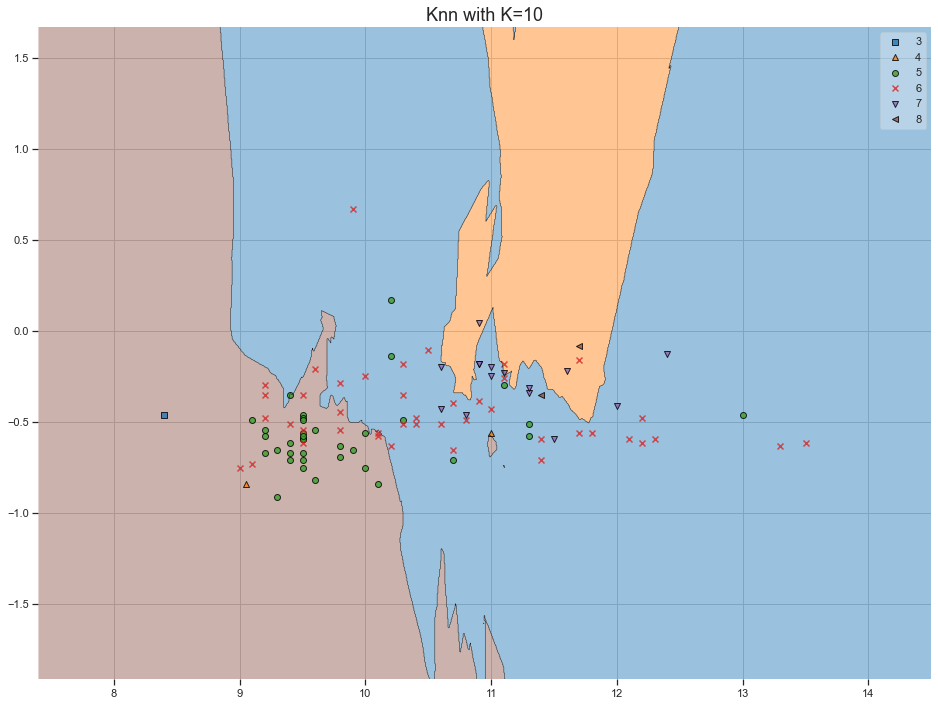

In [85]:
knn_comparison(data_sample, 10);